# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_complete = pd.DataFrame(study_complete)
study_complete.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(study_complete['Mouse ID'].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_complete[study_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_all = study_complete[study_complete['Mouse ID'] == "g989"]
duplicate_mice_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Remove duplicate Mouse ID g989 as it is determined to be void for the Mouse Pymaceuticals test
study_clean = study_complete.loc[study_complete['Mouse ID'] != "g989"]
study_clean['Mouse ID'] = study_clean['Mouse ID'].str.strip() # trimming Mouse ID to remove extra spaces that may impact dedupe count results
study_clean = study_clean.dropna() # removing empty values as further validation
study_clean = study_clean.sort_values(by=["Mouse ID", "Timepoint"])
study_clean

C:\Users\gfoley\AppData\Local\Temp\ipykernel_18964\188834741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_clean['Mouse ID'] = study_clean['Mouse ID'].str.strip() # trimming Mouse ID to remove extra spaces that may impact dedupe count results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = study_clean['Mouse ID'].unique()
len(mouse_count_clean)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats = {
    'Mean Tumor Volume': tumor_mean,
    'Median Tumor Volume': tumor_median,
    'Tumor Volume Variance': tumor_var,
    'Tumor Volume Std. Dev.': tumor_std,
    'Tumor Volume Std. Err.': tumor_sem
}

summary_stats = pd.DataFrame(summary_stats)
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# summary_agg = study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_agg = study_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean = "mean",
    Median = "median",
    Variance = "var",
    STDev = "std",
    STErr = "sem"
)

summary_agg = pd.DataFrame(summary_agg)
summary_agg

,Mean,Median,Variance,STDev,STErr
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

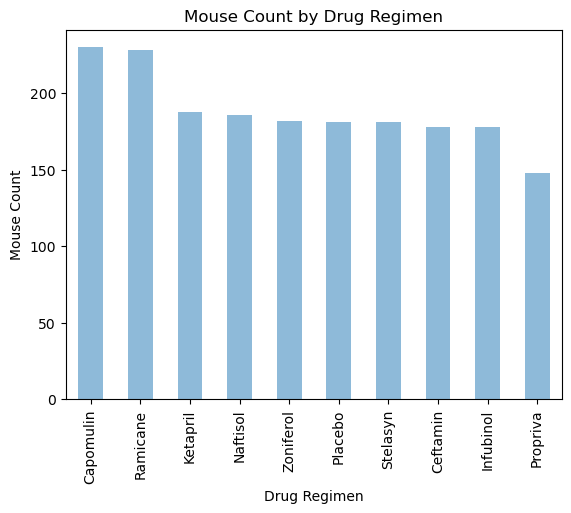

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_mouse_count = study_clean.groupby("Drug Regimen")["Mouse ID"].count()
drug_regimen_mouse_count = drug_regimen_mouse_count.sort_values(ascending=False)

drug_regimen_mouse_count.plot(kind="bar",
                        alpha=0.5,
                        title="Mouse Count by Drug Regimen",
                        xlabel="Drug Regimen",
                        ylabel="Mouse Count")
plt.show()

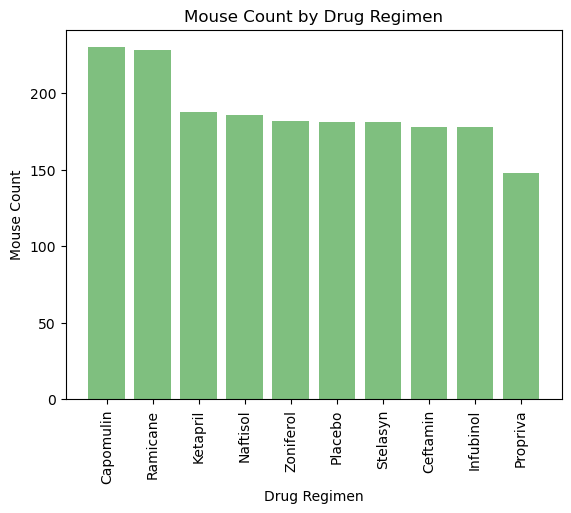

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_mouse_count = study_clean.groupby("Drug Regimen")["Mouse ID"].count() # re-stablishing group by variable
drug_regimen_mouse_count = drug_regimen_mouse_count.sort_values(ascending=False) # re-establishing sort
x = np.arange(len(drug_regimen_mouse_count))
tick_locations = [value for value in x]
plt.bar(x, drug_regimen_mouse_count, color="green", alpha=0.5, align="center")
plt.xticks(tick_locations, drug_regimen_mouse_count.index, rotation="vertical")
plt.title("Mouse Count by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.show()


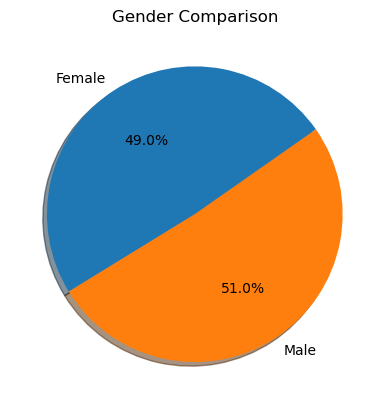

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = study_clean.groupby("Sex")["Mouse ID"].count() 
gender_count.plot(kind="pie",
                  title="Gender Comparison",
                  autopct="%1.1f%%",
                  shadow=True,
                  startangle=35,
                 ).yaxis.set_visible(False)
plt.show()

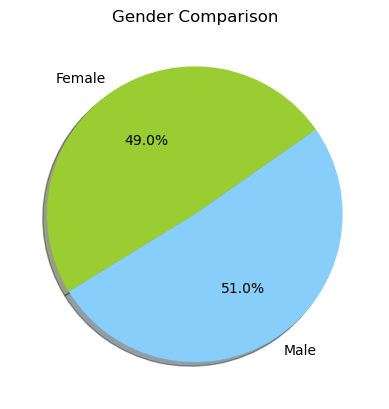

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = study_clean.groupby("Sex")["Mouse ID"].count() 
colors = ["yellowgreen", "lightskyblue"]
plt.pie(gender_count, 
        labels=gender_count.index,
        colors=colors,
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=35)
plt.title("Gender Comparison")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = study_clean.groupby("Mouse ID")["Timepoint"].max()
max_timepoint.reset_index

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
pd.merge(study_clean, max_timepoint, how = "right", on = "Mouse ID")


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,a203,Infubinol,Female,20,23,0,45.000000,0,45
1,a203,Infubinol,Female,20,23,5,48.508468,0,45
2,a203,Infubinol,Female,20,23,10,51.852437,1,45
3,a203,Infubinol,Female,20,23,15,52.777870,1,45
4,a203,Infubinol,Female,20,23,20,55.173336,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

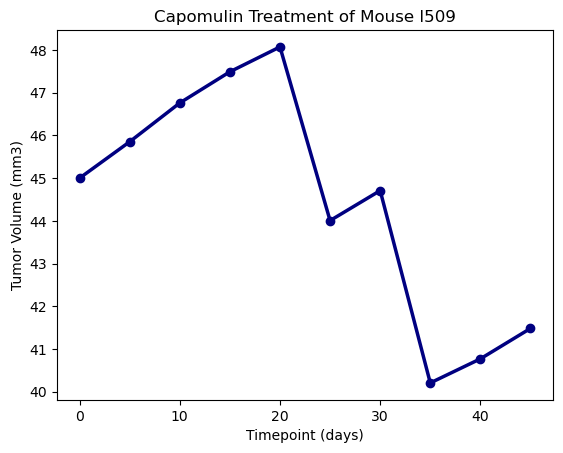

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filtering study_clean to Capomulin drug regimen
capomulin_regimen = study_clean.loc[(study_clean["Drug Regimen"] == "Capomulin")]
single_mouse = capomulin_regimen.loc[(capomulin_regimen["Mouse ID"]) == "l509"]

# Creating X and Y variables from single_mouse data
timepoint = single_mouse["Timepoint"]
tumor_volume = single_mouse["Tumor Volume (mm3)"]

# Plotting
plt.plot(timepoint, tumor_volume, color="navy", label="Mouse l509", linewidth=2.5, marker="o")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

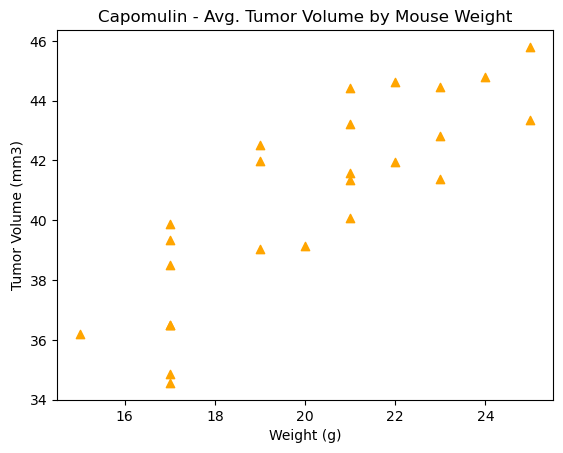

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = study_clean.loc[(study_clean["Drug Regimen"] == "Capomulin")] # Filtering study_clean to Capomulin drug regimen
capomulin_regimen = pd.DataFrame(capomulin_regimen) # creating DataFrame to assist with aggregation error based on data type
capomulin_tumor_avg = capomulin_regimen.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean() # grouping by Mouse ID and averaging stats

# Creating X and Y variables
mouse_weight = capomulin_tumor_avg["Weight (g)"]
tumor_vol_avg = capomulin_tumor_avg["Tumor Volume (mm3)"]

# Plotting
plt.scatter(mouse_weight, tumor_vol_avg, marker="^", color="orange")
plt.title("Capomulin - Avg. Tumor Volume by Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
